Best Mu =  0.24
Best Skew =  0.0


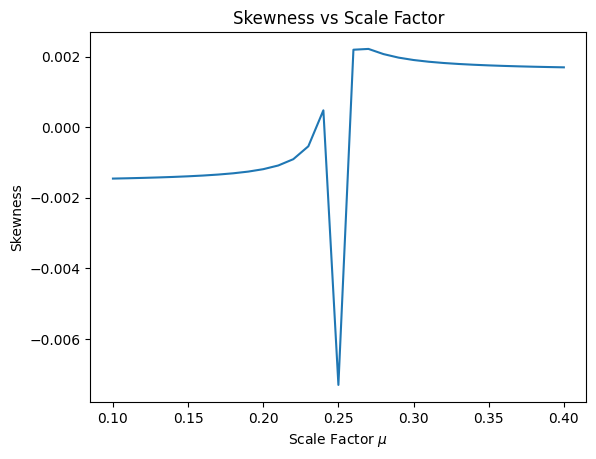

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

#Static background noise
background_noise_NB = -10
background_noise_BB = -10

#Defining paramaters for reference model
pixel_num = 10**5 #total pixel count
num_Stars = 200 #Number of stars

#Subtracts one dataset from another according to a scale factor mu
def subtractData(data1, data2, mu):
    newData = data1 - (mu*data2)
    return newData

#Calculates skewness using function from paper
def calcSkewness(data):
    skewness = 0 #Temporary
    pixelCount = 10**5
    mean = data.mean()
    std = data.std()
    skewness = np.sum(((data-mean)/std)**3)/(pixelCount-1)
    return skewness

#Compares different scale constants to determine which one results in a skewness closest to 0, and hence the most optimal
def determineBestMu(NBdata, BBdata):
    bestSkew = 1000000000.0
    bestMu = 0
    skews = []
    mus = []
    for mu in np.arange(0.2, 0.3, 0.01):
        mus.append(mu)
        subtractedData = subtractData(NBData, BBData, mu)
        currSkew = calcSkewness(subtractedData)
        skews.append(currSkew)
        if abs(currSkew) < abs(bestSkew):
            bestSkew = currSkew
            bestMu = mu
    plt.plot(mus, skews)
    plt.xlabel(r"Scale Factor $\mu$")
    plt.ylabel("Skewness")
    plt.title("Skewness vs Scale Factor")
    return bestMu, bestSkew

#Defining possible narrow band star fluxes, possible positions of stars, and gaussians
NB_flux_star_Min = 2.0 #a_i
NB_flux_star_Max = 202.0

# Standard deviations for noise simulation
NB_gaussian_noise_sigma = 1
BB_gaussian_noise_sigma = 2

#Set background noise
background_noise_NB = -10
background_noise_BB = -10

#Setting a random seed to always get the same output
np.random.seed(18)

#Calculate an array of random fluxes between the bounds with as many 
stellar_flux_NB = np.random.uniform(NB_flux_star_Min, NB_flux_star_Max, pixel_num)
stellar_flux_BB = 4 * stellar_flux_NB

#Randomise Additional noise within the standard deviations specified above
noise_NB = np.random.normal(0, NB_gaussian_noise_sigma, pixel_num)
noise_BB = noise_NB
# noise_BB = np.random.normal(0, BB_gaussian_noise_sigma, pixel_num)

#Add up all arrays to get one superimposed array
NBData = stellar_flux_NB + background_noise_NB + noise_NB
BBData = stellar_flux_BB + background_noise_BB + noise_BB

#Determine most optimal Mu
optMu, optSkew = determineBestMu(NBData, BBData)
#Print results
print("Best Mu = ",round(optMu, 2))
print("Best Skew = ",round(optSkew, 2))

